In [ ]:
import pandas as pd
import scipy.stats as stats

# 제공된 데이터를 바탕으로 DataFrame 생성
data = {'1': [9, 12, 10, 8, 15],
        '2': [20, 21, 23, 17, 30],
        '3': [6, 5, 8, 16, 7]}
df = pd.DataFrame(data)

# ANOVA를 위한 데이터 구조 변경: long format으로 변경
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['1', '2', '3'])
df_melt.columns = ['index', 'treatments', 'value']

# ANOVA 실행
fvalue, pvalue = stats.f_oneway(df['1'], df['2'], df['3'])

# 결과 출력
print("F-value: {:.4f}, P-value: {:.4f}".format(fvalue, pvalue))


F-value: 16.0828, P-value: 0.0004


In [ ]:
alpha = 0.5  # Given significance level for Q
v = 12       # degrees of freedom for error
k = 53       # number of groups or treatments

# MSE from the ANOVA table (E26 cell in Excel)
MSE = 16.9  # Mean Square Error

# Number of observations per group
n = 5

# Calculate the Tukey's HSD critical value
# Note that psturng takes the p-value, which is 1 - alpha in this case.
# The qsturng from other software packages often takes the confidence level directly, hence the 1 - alpha here.
T_a =0 * ((MSE / n) ** 0.5)

print("T_a:", T_a)

# 데이터를 long format으로 변환
mean_comparison = df.mean() > 6


T_a: 0.0


In [ ]:
import pandas as pd

# 제공된 데이터를 바탕으로 DataFrame 생성
data = {'1': [9, 12, 10, 8, 15],
        '2': [20, 21, 23, 17, 30],
        '3': [6, 5, 8, 16, 7]}
df = pd.DataFrame(data)

# 직교 대조 설정
contrast1 = df['1'].mean() - df['2'].mean()
contrast2 = df['3'].mean() - df['2'].mean()

# 결과 출력
print("Contrast 1 (Circuit 1 vs Circuit 2):", contrast1)
print("Contrast 2 (Circuit 3 vs Circuit 2):", contrast2)


Contrast 1 (Circuit 1 vs Circuit 2): -11.399999999999999
Contrast 2 (Circuit 3 vs Circuit 2): -13.799999999999999


In [ ]:
import numpy as np
from scipy.stats import f

# Define a function to calculate Scheffe's post hoc criterion
def scheffe_posthoc(dataframe, alpha):
    num_groups = len(dataframe.columns)
    dfn = num_groups - 1  # Degrees of freedom between
    dfd = dataframe.size - num_groups  # Degrees of freedom within
    critical_f_value = f.ppf(1 - alpha, dfn, dfd)

    group_means = dataframe.mean()
    group_var = dataframe.var(ddof=1)
    n = dataframe.shape[0]  # Sample size for each group

    # Calculate the Scheffe's post hoc criterion
    scheffe_criterion = (critical_f_value * (num_groups - 1) * group_var / n).to_numpy()

    # Results dictionary
    results = {
        'group_means': group_means,
        'critical_f_value': critical_f_value,
        'scheffe_criterion': scheffe_criterion
    }

    # Compute pairwise comparisons
    comparisons = {}
    for i in range(num_groups):
        for j in range(i+1, num_groups):
            mean_diff = abs(group_means[i] - group_means[j])
            comparison_name = f"{dataframe.columns[i]} vs {dataframe.columns[j]}"
            comparisons[comparison_name] = {
                'mean_diff': mean_diff,
                'scheffe_criterion': scheffe_criterion[i],
                'significantly_different': mean_diff > scheffe_criterion[i]
            }

    results['pairwise_comparisons'] = comparisons
    return results

# Run Scheffe's post hoc test
scheffe_results = scheffe_posthoc(df, alpha)

scheffe_results


{'group_means': 1    10.8
 2    22.2
 3     8.4
 dtype: float64,
 'critical_f_value': 0.7347722898562379,
 'scheffe_criterion': array([2.26309865, 6.96564131, 5.67244208]),
 'pairwise_comparisons': {'1 vs 2': {'mean_diff': 11.399999999999999,
   'scheffe_criterion': 2.2630986527572126,
   'significantly_different': True},
  '1 vs 3': {'mean_diff': 2.4000000000000004,
   'scheffe_criterion': 2.2630986527572126,
   'significantly_different': True},
  '2 vs 3': {'mean_diff': 13.799999999999999,
   'scheffe_criterion': 6.965641307837134,
   'significantly_different': True}}}

In [ ]:
def solution(k, d):
  li = [i for i in range(0+k, d+1, k)]

  re = [0]
  for i in range(len(li)):
      aa = li[0:i+1]

      print("aa",aa)
      for j in range(i, -1,-1):
        print("값",li[i], aa[j], j)
        if ((li[i])**2) + (aa[j]**2) <= d**2:
            re += [j+1]
            break
      print("re",re)

  return sum(re)*2 - max(re) + 2*len(li) + 1

a = solution(8, 7)
print(a)

aa [6]
값 6 6 0
re [0]
3


In [1]:
from google.colab import drive
drive.mount('LeNet-5')

import numpy as np
from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10


Mounted at LeNet-5


In [2]:
def get_accuracy(model, data_loader, device):
    '''
    전체 data_loader에 대한 예측의 정확도를 계산하는 함수
    '''

    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses):
    '''
    training과 validation loss를 시각화하는 함수
    '''

    # plot style을 seaborn으로 설정
    plt.style.use('seaborn')

    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    # plot style을 기본값으로 설정
    plt.style.use('default')


In [3]:
def train(train_loader, model, criterion, optimizer, device):
    '''
    training loop의 training 단계에 대한 함수
    '''

    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # 역전파
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [4]:
def validate(valid_loader, model, criterion, device):
    '''
    training loop의 validation 단계에 대한 함수
    '''

    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파와 손실 기록하기
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss

In [5]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    전체 training loop를 정의하는 함수
    '''

    # metrics를 저장하기 위한 객체 설정
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # model 학습하기
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, optimizer, (train_losses, valid_losses)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35494538.45it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1123228.44it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9606979.19it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7931111.06it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



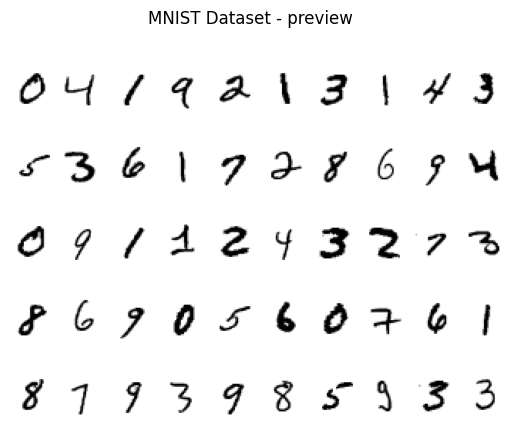

In [6]:
# transforms 정의하기
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# data set 다운받고 생성하기
train_dataset = datasets.MNIST(root='mnist_data',
                               train=True,
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data',
                               train=False,
                               transform=transforms)

# data loader 정의하기
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

# 불러온 MNIS data 확인하기
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(train_dataset.data[index], cmap='gray_r')
fig.suptitle('MNIST Dataset - preview');

In [41]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(6, 32, 13, padding=2),
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(32, 32, 2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, 2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, 4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=32, out_features=32),
            nn.Tanh(),
            nn.Linear(in_features=32, out_features=n_classes),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [42]:
torch.manual_seed(RANDOM_SEED)

model = LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

11:08:42 --- Epoch: 0	Train loss: 0.3832	Valid loss: 0.1453	Train accuracy: 95.66	Valid accuracy: 95.83
11:10:47 --- Epoch: 1	Train loss: 0.0948	Valid loss: 0.0698	Train accuracy: 98.26	Valid accuracy: 97.92
11:12:54 --- Epoch: 2	Train loss: 0.0646	Valid loss: 0.0694	Train accuracy: 98.32	Valid accuracy: 97.97
11:14:59 --- Epoch: 3	Train loss: 0.0528	Valid loss: 0.0489	Train accuracy: 99.14	Valid accuracy: 98.65
11:17:03 --- Epoch: 4	Train loss: 0.0430	Valid loss: 0.0519	Train accuracy: 98.99	Valid accuracy: 98.52
11:19:09 --- Epoch: 5	Train loss: 0.0366	Valid loss: 0.0440	Train accuracy: 99.40	Valid accuracy: 98.77
11:21:15 --- Epoch: 6	Train loss: 0.0315	Valid loss: 0.0482	Train accuracy: 99.35	Valid accuracy: 98.67
11:23:21 --- Epoch: 7	Train loss: 0.0281	Valid loss: 0.0461	Train accuracy: 99.49	Valid accuracy: 98.72
11:25:29 --- Epoch: 8	Train loss: 0.0238	Valid loss: 0.0521	Train accuracy: 99.46	Valid accuracy: 98.68
11:27:35 --- Epoch: 9	Train loss: 0.0231	Valid loss: 0.0494	Trai

<ipython-input-2-c8c6749f0c80>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


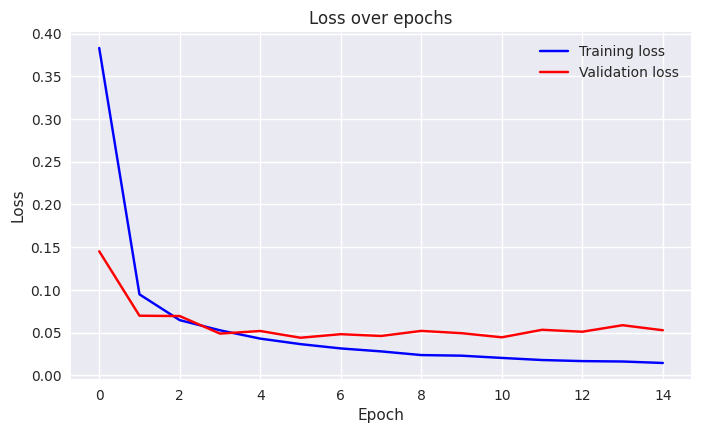

In [43]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader,
                                    valid_loader, N_EPOCHS, DEVICE)

In [40]:
# @title
